In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


In [2]:
cancerDataSet=pd.read_csv('../input/wisconsin_breast_cancer.csv')
cancerDataSet.fillna(0,inplace=True) #removes non numbers
print(cancerDataSet['nuclei'])

cancerDataSet.head(10)

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
5      10.0
6      10.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      3.0
13      3.0
14      9.0
15      1.0
16      1.0
17      1.0
18     10.0
19      1.0
20     10.0
21      7.0
22      1.0
23      0.0
24      1.0
25      7.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
669     5.0
670     8.0
671     1.0
672     1.0
673     1.0
674     1.0
675     1.0
676     1.0
677     1.0
678     1.0
679     1.0
680    10.0
681    10.0
682     1.0
683     1.0
684     1.0
685     1.0
686     1.0
687     1.0
688     1.0
689     1.0
690     1.0
691     5.0
692     1.0
693     1.0
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: nuclei, Length: 699, dtype: float64


id  thickness  size  shape  ...    chromatin  nucleoli  mitosis  class
0  1000025          5     1      1  ...            3         1        1      0
1  1002945          5     4      4  ...            3         2        1      0
2  1015425          3     1      1  ...            3         1        1      0
3  1016277          6     8      8  ...            3         7        1      0
4  1017023          4     1      1  ...            3         1        1      0
5  1017122          8    10     10  ...            9         7        1      1
6  1018099          1     1      1  ...            3         1        1      0
7  1018561          2     1      2  ...            3         1        1      0
8  1033078          2     1      1  ...            1         1        5      0
9  1033078          4     2      1  ...            2         1        1      0

[10 rows x 11 columns]

In [3]:
from sklearn.model_selection import train_test_split
x=cancerDataSet.iloc[:, 1:10]
y=cancerDataSet.iloc[:,10:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=1266415)
print(x_train.shape,y_train.shape)

(559, 9) (559, 1)


In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score,accuracy_score
my_classifier=SGDClassifier(random_state=1266415)

from sklearn.model_selection import cross_val_score


In [5]:
def findcolumns(alt, x_train):
    cols=list()
    
    if(alt&1==1):
      cols.append(x_train.columns[0])
    if(alt&2==2):
      cols.append(x_train.columns[1])
    if(alt&4==4):
      cols.append(x_train.columns[2])
    if(alt&8==8):
      cols.append(x_train.columns[3])
    if(alt&16==16):
      cols.append(x_train.columns[4])
    if(alt&32==32):
      cols.append(x_train.columns[5])
    if(alt&64==64):
      cols.append(x_train.columns[6])
    if(alt&128==128):
      cols.append(x_train.columns[7])
    if(alt&256==256):
      cols.append(x_train.columns[8])
    return cols
   
subsets=list()
for alt in range(1,512):
    subset = findcolumns(alt, x_train)
    print(alt, subset)
    subsets.append(subset)
  
print(len(subsets))

1 ['thickness']
2 ['size']
3 ['thickness', 'size']
4 ['shape']
5 ['thickness', 'shape']
6 ['size', 'shape']
7 ['thickness', 'size', 'shape']
8 ['adhesion']
9 ['thickness', 'adhesion']
10 ['size', 'adhesion']
11 ['thickness', 'size', 'adhesion']
12 ['shape', 'adhesion']
13 ['thickness', 'shape', 'adhesion']
14 ['size', 'shape', 'adhesion']
15 ['thickness', 'size', 'shape', 'adhesion']
16 ['single']
17 ['thickness', 'single']
18 ['size', 'single']
19 ['thickness', 'size', 'single']
20 ['shape', 'single']
21 ['thickness', 'shape', 'single']
22 ['size', 'shape', 'single']
23 ['thickness', 'size', 'shape', 'single']
24 ['adhesion', 'single']
25 ['thickness', 'adhesion', 'single']
26 ['size', 'adhesion', 'single']
27 ['thickness', 'size', 'adhesion', 'single']
28 ['shape', 'adhesion', 'single']
29 ['thickness', 'shape', 'adhesion', 'single']
30 ['size', 'shape', 'adhesion', 'single']
31 ['thickness', 'size', 'shape', 'adhesion', 'single']
32 ['nuclei']
33 ['thickness', 'nuclei']
34 ['size', 

In [6]:
scores=list() 
sgdscores=list()
max_score=0
best_subset=0
sgdmodel=SGDClassifier(random_state=1266415)
for subset in subsets:
    cvscore=cross_val_score(sgdmodel,x_train[subset],y_train,cv=10,scoring="accuracy")
    scores.append(np.mean(cvscore))
    if scores[-1]>max_score:
        max_score=scores[-1]
        best_subset=subset
    #print(subset, scores[-1])
    sgdmodel.fit(x_train[subset],y_train)
    prediction=sgdmodel.predict(x_test[subset])
    sgdscores.append(accuracy_score(y_test,prediction))
    print(sgdscores)
    
    

[0.7571428571428571]
[0.7571428571428571, 0.9071428571428571]
[0.7571428571428571, 0.9071428571428571, 0.95]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143, 0.9357142857142857]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143, 0.9357142857142857, 0.9285714285714286]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143, 0.9357142857142857, 0.9285714285714286, 0.95]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143, 0.9357142857142857, 0.9285714285714286, 0.95, 0.8214285714285714]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143, 0.9357142857142857, 0.9285714285714286, 0.95, 0.8214285714285714, 0.8214285714285714]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.8642857142857143, 0.9357142857142857, 0.9285714285714286, 0.95, 0.8214285714285714, 0.8214285714285714, 0.8142857142857143]
[0.7571428571428571, 0.9071428571428571, 0.95, 0.864285714

In [7]:
print(scores)


[0.8280918204602414, 0.9197567783094099, 0.9411562998405104, 0.928524151287309, 0.9392071086807929, 0.9518728639781271, 0.9465134426976534, 0.8045773524720893, 0.9017640692640692, 0.9357342219184324, 0.9500535429482797, 0.9499561403508772, 0.9500837320574161, 0.9518381180223283, 0.9374874686716792, 0.8692350193665984, 0.9109489633173844, 0.924891205285942, 0.9374225336067441, 0.9320631123262701, 0.9373251310093416, 0.9499584187742082, 0.95177660059239, 0.9125444292549556, 0.9447265892002734, 0.9392720437457278, 0.9484278879015721, 0.9462884483937115, 0.9499886078833446, 0.9500837320574161, 0.9572300068352699, 0.8957028935976303, 0.9465436318067896, 0.9499248120300752, 0.9625882889040783, 0.9498285486443381, 0.9606738437001596, 0.9642788790157212, 0.969732285258601, 0.9374851902483481, 0.9556345408976987, 0.9606738437001594, 0.9626509455456823, 0.9552830940988836, 0.9606413761676919, 0.9552517657780815, 0.9625244930508087, 0.9301173388015492, 0.9572277284119389, 0.9606425153793575, 0.96

In [8]:
print(max(scores))
print(max_score)
print(best_subset)
# the "thickness,shape,adhesion,nuclei,nucleoli,mitosis" subset looks the best given the cv scores.
# the accuracy of this subset is 0.9768762816131238

0.9768762816131238
0.9768762816131238
['thickness', 'shape', 'adhesion', 'nuclei', 'nucleoli', 'mitosis']


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


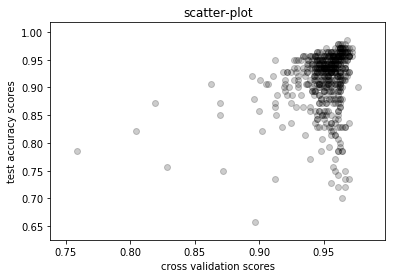

In [9]:
import matplotlib.pyplot as plt
colors=(0,0,0)

plt.scatter(scores, sgdscores, c=colors, alpha=0.2)
plt.title('scatter-plot')
plt.xlabel('cross validation scores')
plt.ylabel('test accuracy scores')
plt.show()

In [10]:
# Based on the plot, the the best cross validation score does not correspond to the best test accuracy

    




In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_scores=list() 
rf_testscores=list()
rfmax_score=0
rfbest_subset=0
rfc=RandomForestClassifier(n_estimators=30,random_state=1266415)
for subset in subsets:
    rfscore=cross_val_score(rfc,x_train[subset],y_train,cv=10,scoring="accuracy")
    rf_scores.append(np.mean(rfscore))
    if rf_scores[-1]>rfmax_score:
        rfmax_score=rf_scores[-1]
        rfbest_subset=subset
    #print(subset, scores[-1])
    rfc.fit(x_train[subset],y_train)
    prediction=rfc.predict(x_test[subset])
    rf_testscores.append(accuracy_score(y_test,prediction))
    print(rf_testscores)

[0.8857142857142857]
[0.8857142857142857, 0.9214285714285714]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9, 0.9285714285714286]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9, 0.9285714285714286, 0.9357142857142857]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9, 0.9285714285714286, 0.9357142857142857, 0.9571428571428572]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9, 0.9285714285714286, 0.9357142857142857, 0.9571428571428572, 0.8214285714285714]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9, 0.9285714285714286, 0.9357142857142857, 0.9571428571428572, 0.8214285714285714, 0.8785714285714286]
[0.8857142857142857, 0.9214285714285714, 0.9428571428571428, 0.9, 0.9285714285714286, 0.9357142857142857, 0.9571428571428572, 0.8214285714285714, 0.8785714285714286, 0.9071428571428

In [12]:
print(rfmax_score)
print(rfbest_subset)
# questions one and two are answered below

0.9750905673274095
['thickness', 'size', 'shape', 'single', 'nuclei', 'chromatin', 'nucleoli']


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


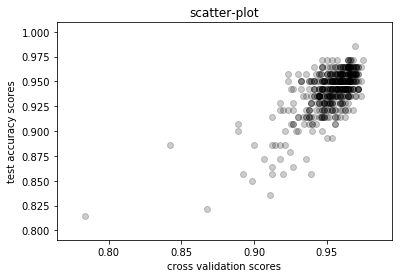

In [13]:
plt.scatter(rf_scores, rf_testscores, c=colors, alpha=0.2)
plt.title('scatter-plot')
plt.xlabel('cross validation scores')
plt.ylabel('test accuracy scores')
plt.show()

In [14]:
# again the best cvscore does not match the best test score
from sklearn.naive_bayes import GaussianNB
gnb_scores=list() 
gnb_testscores=list()
gnbmax_score=0
gnbbest_subset=0
gnb=GaussianNB()
for subset in subsets:
    gnbscore=cross_val_score(gnb,x_train[subset],y_train,cv=10,scoring="accuracy")
    gnb_scores.append(np.mean(gnbscore))
    if gnb_scores[-1]>gnbmax_score:
        gnbmax_score=gnb_scores[-1]
        gnbbest_subset=subset
    #print(subset, scores[-1])
    gnb.fit(x_train[subset],y_train)
    prediction=gnb.predict(x_test[subset])
    gnb_testscores.append(accuracy_score(y_test,prediction))
    print(gnb_testscores)


[0.8857142857142857]
[0.8857142857142857, 0.9214285714285714]
[0.8857142857142857, 0.9214285714285714, 0.95]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714, 0.9357142857142857]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714, 0.9357142857142857, 0.95]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714, 0.9357142857142857, 0.95, 0.8214285714285714]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714, 0.9357142857142857, 0.95, 0.8214285714285714, 0.9]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714, 0.9357142857142857, 0.95, 0.8214285714285714, 0.9, 0.9357142857142857]
[0.8857142857142857, 0.9214285714285714, 0.95, 0.9, 0.9214285714285714, 0.9357142857142857, 0.95, 0.8214285714285714, 0.9, 0.9357142857142857, 0.9357142857142857]
[0.8857142857142857, 0.9214285

In [15]:
print(gnbmax_score)
print(gnbbest_subset)
#Question one and question two are answered below

0.9732410571884257
['thickness', 'shape', 'adhesion', 'nuclei', 'chromatin', 'nucleoli']


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


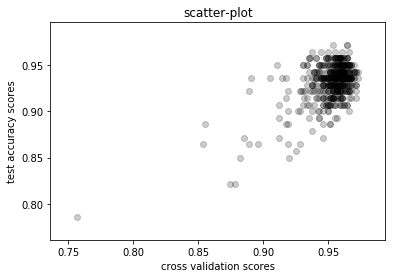

In [16]:
plt.scatter(gnb_scores, gnb_testscores, c=colors, alpha=0.2)
plt.title('scatter-plot')
plt.xlabel('cross validation scores')
plt.ylabel('test accuracy scores')
plt.show()
#again the best cv result does not seem to match the best test-result

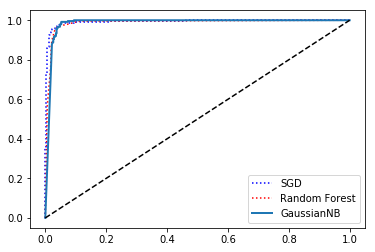

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
sgd_clfRoc=SGDClassifier(random_state=1266415)
y_probas_sgd=cross_val_predict(sgd_clfRoc,x,y,cv=10,method="decision_function")
sgd_fp,sgd_tp,sgd_thr=roc_curve(y,y_probas_sgd)

rf_clfRoc=RandomForestClassifier(random_state=1266415)
y_probas_forest=cross_val_predict(rf_clfRoc,x,y,cv=10,method="predict_proba")
y_scores_forest=y_probas_forest[:,1]
rf_fp,rf_tp,rf_thr=roc_curve(y,y_scores_forest)

gnb_clfRoc=GaussianNB()
y_probas_gnb=cross_val_predict(gnb_clfRoc,x,y,cv=10,method="predict_proba")
y_scores_gnb=y_probas_gnb[:,1]
gnb_fp,gnb_tp,gnb_thr=roc_curve(y,y_scores_gnb)

plt.plot(sgd_fp,sgd_tp,"b:",label="SGD")
plt.plot(rf_fp,rf_tp,"r:",label="Random Forest")
plot_roc_curve(gnb_fp,gnb_tp,"GaussianNB")
plt.legend(loc="lower right")